In [2]:
import numpy as np
import pandas as pd
import altair as alt
from sklearn.model_selection import train_test_split

In [3]:
list_of_invalid_entries = ['1 DH', '2 DH', '3 DH', '4 DH', '5 DH', '6 DH', 'WV',
                               '7 DH', '8 DH', 'PU', '9 DH', 'UR', 'WV-A', 'FE', 'DNF', 'WX', 'TNP', 'WX-A', 'DISQ']

horse_info = pd.read_csv("horse_info.csv",
                         index_col=0)
results = pd.read_csv("results.csv",
                      index_col=0,
                      dtype={"plc": np.float64},
                      na_values=list_of_invalid_entries)
comments = pd.read_csv("comments.csv",
                       index_col=0,
                       dtype={"plc": np.float64},
                       na_values=list_of_invalid_entries)
track_work = pd.read_csv("trackwork.csv",
                         index_col=0)
barrier = pd.read_csv("barrier.csv",
                      index_col=0)

In [4]:
results['dataset'] = 'results'
results_comments = pd.merge(results, comments, how="left", on=["date", "raceno", "plc", "horseno"])

In [5]:
barrier.rename(columns={"time": "finishtime"})
barrier['dataset'] = 'barrier'
results_comments_barriers = pd.concat((results_comments, barrier), axis=0, ignore_index=False, sort=False)

In [6]:
final_df = pd.merge(results_comments_barriers, horse_info, how="left", on=["horse"])

In [7]:
final_df = final_df[final_df.columns[~final_df.columns.str.contains('.*_ch')]]

In [8]:
final_df = final_df.drop(['trainer_y'], axis=1)

In [9]:
final_df.columns

Index(['row', 'plc', 'horseno', 'horse', 'jockey', 'trainer_x', 'actualwt',
       'declarwt', 'draw', 'lbw', 'runningpos', 'finishtime', 'winodds',
       'date', 'raceno', 'class', 'distance', 'going', 'handicap', 'course',
       'stake', 'venue', 'dataset', 'gear', 'comment', 'time', 'result',
       'country', 'colour', 'sex', 'owner', 'import_type', 'current_rating',
       'start_rating', 'sire', 'dam', 'age'],
      dtype='object')

In [10]:
data_train, data_test = train_test_split(final_df, 
                                             random_state=1,
                                             test_size=0.2,
                                             shuffle=True)

In [11]:
data_train.describe(include = 'all')

,row,plc,horseno,horse,jockey,trainer_x,actualwt,declarwt,draw,lbw,...,country,colour,sex,owner,import_type,current_rating,start_rating,sire,dam,age
count,11285.000000,18422.000000,11146.000000,18744,18541,18744,11284.000000,11251.000000,18508.000000,17698,...,18397,18397,18397,18397,18392,9144.000000,9144.000000,18397,18397,9144.000000
unique,NaN,NaN,NaN,1962,92,69,NaN,NaN,NaN,321,...,13,7,7,1447,21,NaN,NaN,476,1795,NaN
top,NaN,NaN,NaN,SWEET BEAN(S205),J Moreira,J Size,NaN,NaN,NaN,-,...,AUS,Bay,Gelding,The Hon Ronald Arculli GBM GBS JP & Johanna K ...,PP,NaN,NaN,Fastnet Rock,Starship,NaN
freq,NaN,NaN,NaN,31,1263,1206,NaN,NaN,NaN,905,...,7585,12553,18021,75,9257,NaN,NaN,404,49,NaN
mean,5.976961,6.191673,6.865781,NaN,NaN,NaN,122.853952,1109.069327,6.228712,NaN,...,NaN,NaN,NaN,NaN,NaN,61.468285,62.370297,NaN,NaN,5.960083
std,3.806700,3.507274,3.737905,NaN,NaN,NaN,6.385524,61.416600,3.527772,NaN,...,NaN,NaN,NaN,NaN,NaN,23.807324,22.640663,NaN,NaN,1.191517
min,0.000000,1.000000,1.000000,NaN,NaN,NaN,103.000000,902.000000,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,3.000000,18.000000,NaN,NaN,3.000000
25%,3.000000,3.000000,4.000000,NaN,NaN,NaN,118.000000,1066.000000,3.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,44.000000,46.000000,NaN,NaN,5.000000
50%,6.000000,6.000000,7.000000,NaN,NaN,NaN,123.000000,1107.000000,6.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,60.000000,61.000000,NaN,NaN,6.000000
75%,9.000000,9.000000,10.000000,NaN,NaN,NaN,128.000000,1151.000000,9.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,76.000000,76.000000,NaN,NaN,7.000000


In [12]:
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [13]:
data_train = data_train[~data_train['plc'].isna()]

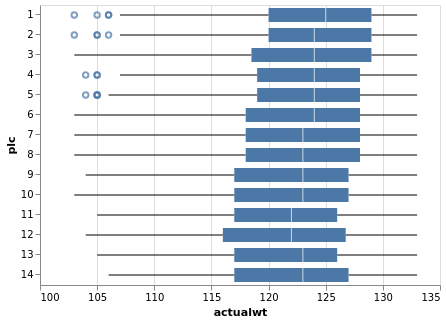

In [14]:
alt.Chart(data_train).mark_boxplot().encode(
    x=alt.X('actualwt:Q', scale=alt.Scale(zero=False)),
    y=alt.Y('plc:N')
)

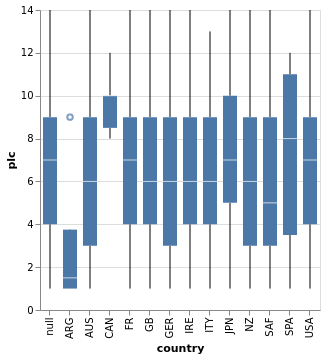

In [15]:
alt.Chart(data_train).mark_boxplot().encode(
    x=alt.X('country:N'),
    y=alt.Y('plc:Q')
)